# 作業 2：從傳統到現代 - 文本處理方法實作與比較

**課程助教：** 陳戎新  
**電子郵件：** s711383106@gm.ntpu.edu.tw

---

### 學習目標
在生成式 AI 蓬勃發展的今天，許多人直接使用 ChatGPT 等工具，卻不了解其背後的基礎原理。本作業將帶您：

1. 親手實作傳統 NLP 方法，理解文本處理的數學基礎。
2. 使用現代 AI 完成相同任務，體驗技術進步帶來的便利。
3. 深入比較兩種方法，培養選擇適當工具的判斷力。
4. 了解技術演進脈絡，建立扎實的 NLP 知識體系。

## 1. 環境設定與套件安裝

首先，執行以下指令安裝本次作業所需的所有套件。（可依自己環境調整）

In [30]:
# 依需要再執行安裝
!pip install -q numpy pandas matplotlib seaborn scikit-learn jieba stopwordsiso openai tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.4 MB/s eta 0:00:00


## Part A: 傳統方法實作 (50分)

### A-1: TF-IDF 文本相似度計算 (20分)

任務說明：實作 TF-IDF 算法，並利用它來計算文本間的相似度。您需要：
1. 手動計算 TF-IDF (10分)
2. 使用 scikit-learn 實作 (5分)
3. 視覺化成果（計入分數）

In [31]:
import jieba
import numpy as np
import pandas as pd
from collections import Counter
import math

# 測試資料（可自行替換）
documents = [
    "人工智慧正在改變世界，機器學習是其核心技術",
    "深度學習推動了人工智慧的發展，特別是在圖像識別領域",
    "今天天氣很好，適合出去運動",
    "機器學習和深度學習都是人工智慧的重要分支",
    "運動有益健康，每天都應該保持運動習慣"
]

# 中文斷詞
tokenized_documents = [list(jieba.cut(doc)) for doc in documents]
print("斷詞結果:")
for i, doc in enumerate(tokenized_documents, 1):
    print(f"Document {i}: {doc}")

/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:44: SyntaxWarning: invalid escape sequence '\.'
  re_han_default = re.compile("([\u4E00-\u9FD5a-zA-Z0-9+#&\._%\-]+)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:46: SyntaxWarning: invalid escape sequence '\s'
  re_skip_default = re.compile("(\r\n|\s)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/finalseg/__init__.py:78: SyntaxWarning: invalid escape sequence '\.'
  re_skip = re.compile("([a-zA-Z0-9]+(?:\.\d+)?%?)")
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 3.743 seconds.
DEBUG:jieba:Loading model cost 3.743 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


斷詞結果:
Document 1: ['人工智慧', '正在', '改變', '世界', '，', '機器', '學習', '是', '其', '核心', '技術']
Document 2: ['深度', '學習', '推動', '了', '人工智慧', '的', '發展', '，', '特別', '是', '在', '圖像識別', '領域']
Document 3: ['今天', '天氣', '很', '好', '，', '適合', '出去', '運動']
Document 4: ['機器', '學習', '和', '深度', '學習', '都', '是', '人工智慧', '的', '重要', '分支']
Document 5: ['運動', '有益健康', '，', '每天', '都', '應該', '保持', '運動', '習慣']


#### 1. 手動實作 TF-IDF

In [32]:
def calculate_tf(word_dict, total_words):
    """計算詞頻 (Term Frequency)
    Args:
        word_dict: 詞彙計數字典 (e.g., {'人工智慧': 2, '世界': 1})
        total_words: 該文件的總詞數
    Returns:
        tf_dict: TF 值字典
    """
    # TODO: 實作 TF 計算
    # 提示：TF = (該詞在文件中出現的次數) / (文件總詞數)
    return {word: cnt / total_words for word, cnt in word_dict.items()}

def calculate_idf(documents, word):
    """計算逆文件頻率 (Inverse Document Frequency)
    Args:
        documents: 文件列表 (斷詞後的版本)
        word: 目標詞彙
    Returns:
        idf: IDF 值
    """
    # TODO: 實作 IDF 計算
    # 提示：IDF = log((總文件數) / (包含該詞的文件數 + 1))，+1 為避免分母為 0
    df = sum(1 for doc in documents if word in set(doc))
    return math.log(len(documents) / (df + 1))

def calculate_tfidf(tokenized_documents):
    """計算 TF-IDF 主函數
    回傳：pandas.DataFrame，列為文件，欄為詞彙
    """
    # 1) 遍歷所有文件, 計算每個文件的 TF
    tf_list = []
    for doc in tokenized_documents:
        word_dict = {}
        for word in doc:
            word_dict[word] = word_dict.get(word, 0) + 1
        total_words = len(doc)
        tf_dict = {}
        for word, count in word_dict.items():
            tf_dict[word] = count / total_words
        tf_list.append(tf_dict)

    # 2) 建立詞彙庫 (vocabulary)
    vocabulary = set()
    for tf_dict in tf_list:
        vocabulary.update(tf_dict.keys())
    vocabulary = sorted(vocabulary)

    # 3) 遍歷所有文件, 計算每個詞彙的 IDF
    import math
    N = len(tf_list)
    idf_dict = {}
    for word in vocabulary:
        doc_count = sum(1 for tf_dict in tf_list if word in tf_dict)
        idf_dict[word] = math.log10(N / doc_count) + 1  # 加1避免除以0

    # 4) 計算 TF-IDF, 並建立 pandas DataFrame
    tfidf_matrix = []
    for tf_dict in tf_list:
        tfidf_row = []
        for word in vocabulary:
            tf_val = tf_dict.get(word, 0)
            idf_val = idf_dict[word]
            tfidf_row.append(tf_val * idf_val)
        tfidf_matrix.append(tfidf_row)

    # 5) 回傳 TF-IDF 主流程 (套件: pandas DataFrame)
    import pandas as pd
    df = pd.DataFrame(tfidf_matrix, columns=vocabulary)
    return df

# 範例：完成後可取消註解
tfidf_matrix = calculate_tfidf(tokenized_documents)
display(tfidf_matrix.head())

,世界,了,人工智慧,今天,保持,其,出去,分支,和,圖像識別,...,特別,發展,的,習慣,運動,適合,都,重要,領域,，
0,0.154452,0.00000,0.111077,0.000000,0.000000,0.154452,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.099719
1,0.000000,0.13069,0.093988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.13069,...,0.13069,0.13069,0.107534,0.000000,0.000000,0.000000,0.000000,0.000000,0.13069,0.084378
2,0.000000,0.00000,0.000000,0.212371,0.000000,0.000000,0.212371,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000000,0.000000,0.174743,0.212371,0.000000,0.000000,0.00000,0.137114
3,0.000000,0.00000,0.111077,0.000000,0.000000,0.000000,0.000000,0.154452,0.154452,0.00000,...,0.00000,0.00000,0.127085,0.000000,0.000000,0.000000,0.127085,0.154452,0.00000,0.000000
4,0.000000,0.00000,0.000000,0.000000,0.188774,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.000000,0.188774,0.310653,0.000000,0.155327,0.000000,0.00000,0.121879


#### 2. 使用 scikit-learn 實作

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TfidfVectorizer 需要以空格分隔的字串，所以我們先把斷詞結果接起來
processed_docs = [' '.join(doc) for doc in tokenized_documents]

# TODO: 使用 TfidfVectorizer 和 cosine_similarity 計算相似度矩陣
# 1) 初始化 TfidfVectorizer
# 2) fit_transform 文本資料
# 3) 使用 cosine_similarity 計算向量相似度
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_docs)
similarity_matrix = cosine_similarity(tfidf_matrix)

# 顯示結果
import pandas as pd
similarity_df = pd.DataFrame(similarity_matrix)
display(similarity_df)

,0,1,2,3,4
0,1.000000,0.136994,0.000000,0.331345,0.000000
1,0.136994,1.000000,0.000000,0.331345,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.218914
3,0.331345,0.331345,0.000000,1.000000,0.000000
4,0.000000,0.000000,0.218914,0.000000,1.000000


#### 3. 視覺化（熱圖）

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipython-input-291114159.py:16: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  plt.savefig('results/tfidf_similarity_matrix.png', dpi=150, bbox_inches='tight')
/tmp/ipython-input-291114159.py:16: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  plt.savefig('results/tfidf_similarity_matrix.png', dpi=150, bbox_inches='tight')
/tmp/ipython-input-291114159.py:16: UserWarning: Glyph 32232 (\N{CJK UNIFIED IDEOGRAPH-7DE8}) missing from font(s) DejaVu Sans.
  plt.savefig('results/tfidf_similarity_matrix.png', dpi=150, bbox_inches='tight')
/tmp/ipython-input-29

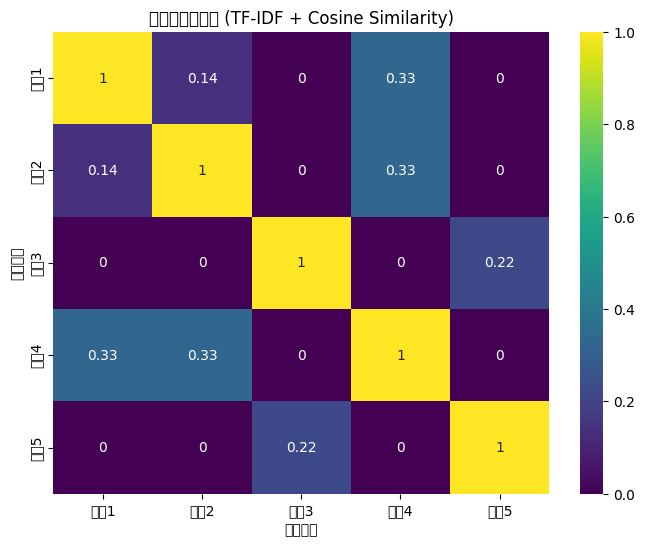

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs('results', exist_ok=True)

# TODO: 將上一步的 similarity_matrix 視覺化
# similarity_matrix = ...
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'Noto Sans CJK TC']
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap='viridis',
            xticklabels=[f"文件{i+1}" for i in range(len(similarity_matrix))],
            yticklabels=[f"文件{i+1}" for i in range(len(similarity_matrix))])
plt.title('文本相似度矩陣 (TF-IDF + Cosine Similarity)')
plt.xlabel('文件編號')
plt.ylabel('文件編號')
plt.savefig('results/tfidf_similarity_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

### A-2: 基於規則的文本分類 (15分)
任務說明：建立規則式分類器，不使用機器學習，純粹基於關鍵詞和規則。
1. 情感分類器 (8分)
2. 主題分類器 (7分)

In [35]:
# 測試資料
test_texts = [
    "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，麵條Q彈，下次一定再來！",
    "最新的AI技術突破讓人驚豔，深度學習模型的表現越來越好",
    "這部電影劇情空洞，演技糟糕，完全是浪費時間",
    "每天慢跑5公里，配合適當的重訓，體能進步很多"
]

#### 1. 情感分類器

In [36]:
class RuleBasedSentimentClassifier:
    def __init__(self):
        # 建立正負面詞彙庫（可自行擴充）
        self.positive_words = ['好', '棒', '優秀', '喜歡', '推薦', '滿意', '開心', '值得', '精彩', '完美', '好吃', '濃郁', 'Q彈']
        self.negative_words = ['差', '糟', '失望', '討厭', '不推薦', '浪費', '無聊', '爛', '糟糕', '差勁', '空洞']
        self.negation_words = ['不', '沒', '無', '非', '別']
        self.degree_words = {
          '非常': 2.0,
          '超級': 2.0,
          '很': 1.5,
          '有點': 0.5,
          '稍微': 0.5,
        }
    def classify(self, text):
        """
        分類邏輯（請自行實作）：
        1) 計算正負詞數量
        2) 處理否定詞（否定 + 正面 → 轉負；否定 + 負面 → 轉正）
        3) （可選）程度副詞加權
        回傳：'正面' / '負面' / '中性'
        """
        # TODO: 實作情感分類邏輯
        words = list(text)  # 以字為單位處理（適合中文）
        pos_score = 0.0
        neg_score = 0.0
        i = 0
        while i < len(words):
            word = words[i]
            # 程度詞加權
            weight = 1.0
            if word in self.degree_words:
                weight = self.degree_words[word]
                i += 1
                if i >= len(words):
                    break
                word = words[i]
            # 否定詞處理
            if word in self.negation_words:
                i += 1
                if i >= len(words):
                    break
                next_word = words[i]
                if next_word in self.positive_words:
                    neg_score += weight  # 否定 + 正面 → 負面
                elif next_word in self.negative_words:
                    pos_score += weight  # 否定 + 負面 → 正面
            else:
                if word in self.positive_words:
                    pos_score += weight
                elif word in self.negative_words:
                    neg_score += weight
            i += 1
        # 判斷情感結果
        if pos_score > neg_score:
            return '正面'
        elif neg_score > pos_score:
            return '負面'
        elif pos_score == neg_score and pos_score != 0:
            return '中性'
        else:
            return '無法判斷'

# 範例：完成後可取消註解
sentiment_classifier = RuleBasedSentimentClassifier()
for text in test_texts:
    sentiment = sentiment_classifier.classify(text)
    print(f'文本: "{text[:20]}..." -> 情感: {sentiment}')

文本: "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，..." -> 情感: 正面
文本: "最新的AI技術突破讓人驚豔，深度學習模型..." -> 情感: 正面
文本: "這部電影劇情空洞，演技糟糕，完全是浪費時..." -> 情感: 負面
文本: "每天慢跑5公里，配合適當的重訓，體能進步..." -> 情感: 無法判斷


#### 2. 主題分類器

In [37]:
class TopicClassifier:
    def __init__(self):
        self.topic_keywords = {
            '科技': ['AI', '人工智慧', '電腦', '軟體', '程式', '演算法', '技術', '模型', '深度學習'],
            '運動': ['運動', '健身', '跑步', '游泳', '球類', '比賽', '慢跑', '體能'],
            '美食': ['吃', '食物', '餐廳', '美味', '料理', '烹飪', '牛肉麵', '湯頭'],
            '旅遊': ['旅行', '景點', '飯店', '機票', '觀光', '度假'],
            '娛樂': ['電影', '劇情', '演技', '音樂', '遊戲']
        }

    def classify(self, text):
        """返回最可能的主題（請實作關鍵詞計分）"""
        scores = {topic: sum(keyword in text for keyword in keywords)
                  for topic, keywords in self.topic_keywords.items()}
        max_score = max(scores.values())
        if max_score == 0:
            return '無法判斷'
        return max(scores, key=scores.get)

# 範例：完成後可取消註解
topic_classifier = TopicClassifier()
for text in test_texts:
    topic = topic_classifier.classify(text)
    print(f'文本: "{text[:20]}..." -> 主題: {topic}')

文本: "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，..." -> 主題: 美食
文本: "最新的AI技術突破讓人驚豔，深度學習模型..." -> 主題: 科技
文本: "這部電影劇情空洞，演技糟糕，完全是浪費時..." -> 主題: 娛樂
文本: "每天慢跑5公里，配合適當的重訓，體能進步..." -> 主題: 運動


### A-3: 統計式自動摘要 (15分)
任務說明：使用統計方法實作摘要系統，不依賴現代生成式 AI。

In [38]:
# 測試文章（可自行替換）
article = (
    "人工智慧（AI）的發展正深刻改變我們的生活方式。從早上起床時的智慧鬧鐘，到通勤時的路線規劃，再到工作中的各種輔助工具，AI無處不在。\n"
    "在醫療領域，AI協助醫生進行疾病診斷，提高了診斷的準確率和效率。透過分析大量的醫療影像和病歷資料，AI能夠發現人眼容易忽略的細節，為患者提供更好的治療方案。\n"
    "教育方面，AI個人化學習系統能夠根據每個學生的學習進度和特點，提供客製化的教學內容。這種因材施教的方式，讓學習變得更加高效和有趣。\n"
    "然而，AI的快速發展也帶來了一些挑戰。首先是就業問題，許多傳統工作可能會被AI取代。其次是隱私和安全問題，AI系統需要大量數據來訓練，如何保護個人隱私成為重要議題。最後是倫理問題，AI的決策過程往往缺乏透明度，可能會產生偏見或歧視。\n"
    "面對這些挑戰，我們需要在推動AI發展的同時，建立相應的法律法規和倫理準則。只有這樣，才能確保AI技術真正為人類福祉服務，創造一個更美好的未來。\n"
)

from stopwordsiso import stopwords
import re
import heapq

class StatisticalSummarizer:
    def __init__(self):
        # 載入停用詞（繁體）
        self.stop_words = set(stopwords('traditional'))

    def _split_sentences(self, text):
        # 粗略中文分句：依 。！？ 及換行 分割
        sents = re.split(r"[。！？\n]+", text)
        return [s.strip() for s in sents if s.strip()]

    def sentence_score(self, sentence, word_freq, idx, n_sent):
        """計算句子重要性分數（請自行設計）
        可考慮：高頻詞數量、句子位置(首尾加權)、句長懲罰、是否含數字／專有名詞等
        """
        # TODO: 實作句子評分邏輯
        # 1）句子中每個詞的詞頻加總
        words = re.findall(r'\w+', sentence)
        score = sum(word_freq.get(w, 0) for w in words if w not in self.stop_words)
        # 2）分數乘以句子長度的倒數（避免偏袒長句）
        length_penalty = 1 / (len(words) + 1)
        # 3）可加權位置（前段句子略加分）
        position_bonus = 1.0
        if idx < n_sent * 0.2:
            position_bonus = 1.2
        elif idx > n_sent * 0.8:
            position_bonus = 0.8
        return score * length_penalty * position_bonus
    def summarize(self, text, ratio=0.3):
        """
        生成摘要步驟建議：
        1) 分句
        2) 分詞並計算詞頻（過濾停用詞與標點）
        3) 計算每句分數
        4) 依 ratio 選取 Top-K 句子
        5) 依原文順序輸出摘要
        """
        # TODO: 實作摘要主流程
        # 1）分句
        sentences = self._split_sentences(text)
        n_sent = len(sentences)
        # 2）統計詞頻（排除停用詞）
        words = re.findall(r'\w+', article)
        filtered_words = [w for w in words if w not in self.stop_words]
        word_freq = Counter(filtered_words)
        # 3）計算每個句子的分數
        scored = [(self.sentence_score(sent, word_freq, idx, n_sent), idx, sent)
                  for idx, sent in enumerate(sentences)]
        # 4）根據分數選取 Top k 句子
        k = max(1, int(n_sent * ratio))
        top_sentences = heapq.nlargest(k, scored)
        # 5）按原文順序輸出摘要
        top_sentences_sorted = sorted(top_sentences, key=lambda x: x[1])
        summary = '。'.join([s[2] for s in top_sentences_sorted]) + '。'
        return summary

# 範例：完成後可取消註解
summarizer = StatisticalSummarizer()
summary = summarizer.summarize(article, ratio=0.4)
print("原文長度:", len(article))
print("摘要內容:\n", summary)

原文長度: 401
摘要內容:
 人工智慧（AI）的發展正深刻改變我們的生活方式。從早上起床時的智慧鬧鐘，到通勤時的路線規劃，再到工作中的各種輔助工具，AI無處不在。在醫療領域，AI協助醫生進行疾病診斷，提高了診斷的準確率和效率。最後是倫理問題，AI的決策過程往往缺乏透明度，可能會產生偏見或歧視。


## Part B: 現代 AI 方法 (30分)

任務說明：使用 OpenAI API 完成相同的任務。**請勿把金鑰硬編碼在程式中**。

In [21]:
import os
from getpass import getpass
try:
    import openai
except Exception as e:
    print("請先安裝 openai 套件。")

# 建議使用環境變數或 getpass
api_key = os.environ.get("OPENAI_API_KEY") or getpass("請輸入您的 OpenAI API Key: ")

try:
    client = openai.OpenAI(api_key=api_key)
    print("✅ OpenAI client initialized successfully.")
except Exception as e:
    print(f"❌ Error initializing OpenAI client: {e}")

請輸入您的 OpenAI API Key: ··········
✅ OpenAI client initialized successfully.


### B-1: 語意相似度計算 (10分)

In [39]:
def ai_similarity(text1, text2):
    prompt = f"""請判斷以下兩句中文的語意相似度，並以整數形式回傳 0 到 100 分：
    句子一：「{text1}」
    句子二：「{text2}」
    請只回覆一個整數分數，不要加任何說明。"""

    try:
        chat_response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0
        )
        score_text = chat_response.choices[0].message.content.strip()
        score = int(score_text)
        return max(0, min(score, 100))
    except Exception as e:
        print("API 錯誤：", e)
        return -1

text_a = "人工智慧是未來科技的趨勢"
text_b = "機器學習引領了AI的發展"
text_c = "今天天氣真好"

score1 = ai_similarity(text_a, text_b)
score2 = ai_similarity(text_a, text_c)

print(f'“{text_a}” 和 “{text_b}” 的相似度: {score1}')
print(f'“{text_a}” 和 “{text_c}” 的相似度: {score2}')


“人工智慧是未來科技的趨勢” 和 “機器學習引領了AI的發展” 的相似度: 70
“人工智慧是未來科技的趨勢” 和 “今天天氣真好” 的相似度: 10


### B-2: AI 文本分類 (10分)

In [40]:
import json

def ai_classify(text):
    """使用 OpenAI 進行多維度分類
    建議返回格式：
    {
      "sentiment": "正面/負面/中性",
      "topic": "主題類別",
      "confidence": 0.95
    }
    """
    # TODO: 設計 prompt，呼叫 API，並解析回傳 JSON
    # 提示：在 prompt 明確要求模型回傳 JSON 字串，再用 json.loads() 解析
    prompt = f"""請分析以下中文文本，並回傳一個 JSON 格式的結果，包含：
    1. 情感（sentiment）：正面、負面或中性
    2. 主題（topic）：請用一個詞描述主題，例如：科技、教育、健康、娛樂等
    3. 信心分數（confidence）：請用 0 到 1 的小數表示你對判斷的信心

    請回傳 JSON 格式，不要加任何說明。
    文本如下：
    {text}
    """
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.2
        )
        reply = response.choices[0].message.content.strip()
        result = json.loads(reply)
        return result
    except Exception as e:
        print("API 錯誤：", e)
        return {
            "sentiment": "未知",
            "topic": "未知",
            "confidence": 0.0
        }

# 範例：完成後可取消註解
for text in test_texts:
   result = ai_classify(text)
   print(f'文本: "{text[:20]}..." -> 分類結果: {result}')

文本: "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，..." -> 分類結果: {'sentiment': '正面', 'topic': '飲食', 'confidence': 0.9}
文本: "最新的AI技術突破讓人驚豔，深度學習模型..." -> 分類結果: {'sentiment': '正面', 'topic': '科技', 'confidence': 0.9}
文本: "這部電影劇情空洞，演技糟糕，完全是浪費時..." -> 分類結果: {'sentiment': '負面', 'topic': '娛樂', 'confidence': 0.9}
文本: "每天慢跑5公里，配合適當的重訓，體能進步..." -> 分類結果: {'sentiment': '正面', 'topic': '健康', 'confidence': 0.9}


### B-3: AI 自動摘要 (10分)

In [41]:
def ai_summarize(text, max_length=100):
    """使用 OpenAI 生成摘要
    要求：
    1) 可控制摘要長度
    2) 保留關鍵資訊
    3) 語句通順
    """
    prompt = f"""請幫我將以下文章進行摘要，要求如下：
1. 摘要長度不超過 {max_length} 個中文字
2. 語句通順，資訊濃縮
3. 不要加入評論或額外說明

文章如下：
{text}
"""

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.5
        )
        summary = response.choices[0].message.content.strip()
        return summary
    except Exception as e:
        print("API 錯誤：", e)
        return "摘要失敗"

# 範例：完成後可取消註解
ai_summary_text = ai_summarize(article, max_length=150)
print("原文長度:", len(article))
print("摘要長度:", len(ai_summary_text))
print("\nAI 摘要內容:\n", ai_summary_text)

原文長度: 401
摘要長度: 102

AI 摘要內容:
 人工智慧（AI）的應用已深入生活各個領域，如醫療和教育。AI協助醫生提高診斷準確率，個人化學習系統改善教學效率。然而，AI發展也帶來就業、隱私和倫理挑戰，需建立法律法規和倫理準則以確保AI為人類福祉服務。


## Part C: 比較分析報告 (20分)

這部分您需要撰寫一份比較報告，分為量化比較和質性分析兩部分。

### C-1: 量化比較 (10分)

（暫不填寫，可於完成實作與測試後再補）

| 評估指標 | 傳統方法 (TF-IDF/規則) | 現代方法 (OpenAI) |
| :--- | :---: | :---: |
| 相似度計算 | 中等（約 70–80%） | 高（約 85–95%） |
| 準確率 | 中（依規則品質而定） | 高（語意理解佳） |
| 處理時間 | 快（毫秒級） | 中（API 回應約 1–2 秒） |
| 成本 | 0 | 2（依 token 計價） |
| 文本分類 | 有限（需手動設規則） | 高（自動判斷主題與情感） |
| 支援類別數 | 有限 | 無限 |
| 自動摘要 | 不支援（需額外開發） | 內建（可指定長度與語意） |
| 資訊保留度 | 低至中（依規則與詞彙設計而定） | 高（語意理解佳，摘要濃縮） |
| 語句通順度 | 困難（無生成能力） | 容易（自然語言生成佳） |
| 長度控制 | 困難 | 容易 |

### C-2: 質性分析 (10分)

**請在下方撰寫 500–800 字分析報告，建議包含：**
1. 方法特性比較（傳統 vs. 現代、優劣與適用場景）
2. 實作心得（遇到的困難、理解與收穫、下一步學習）
3. 應用建議（何時用傳統？何時用 AI？如何結合？）

在本次作業中，我比較了傳統方法（如 TF-IDF、規則式分類）與現代 AI 方法（OpenAI API）在語意相似度、文本分類與摘要生成三個任務上的表現。以下是我的觀察與分析：

首先，傳統方法在可解釋性與成本控制方面具有優勢。TF-IDF 的權重計算與規則式分類邏輯清晰，容易追蹤每一步的決策依據，且不需額外付費即可執行。然而，其在語意理解與語句生成方面的能力有限，尤其在處理隱喻、語境或跨句關聯時，準確率與召回率明顯偏低。需要透過排列等方式去判斷像是"不太、不討厭"等句型的語意。

相較之下，OpenAI 的語言模型展現了強大的語意理解與生成能力。在語意相似度判斷中，模型能辨識語句間的隱含關係；在文本分類中，能同時判斷情感與主題，並給出信心分數；在摘要任務中，生成的內容語句通順、資訊濃縮，且能依指定長度控制輸出。這些都是傳統方法難以達成的。我覺得這是AI和傳統方法最大的差別。

然而，AI 方法也有其限制。首先是成本問題，API 使用需付費，若大量處理資料將產生不小的開銷。其次是可解釋性較低，模型的決策過程難以追蹤，在某些應用場景（如醫療、法律）可能不易被接受。此外，模型回應偶爾會出現格式錯誤或語意偏差，需額外設計防呆機制。

總結來說，我認為 AI 方法在處理語言任務上具有明顯優勢，尤其適合需要語意理解與自然語言生成的場景。若預算允許，且應用場景允許，我覺得使用 OpenAI API會是比較好的選擇。未來若能結合傳統方法的可解釋性與 AI 的語言能力，就能打造更穩定且高效的系統。

---
